Jacqueline Sanchez<br>
July 01, 2024 <br> 
Homework 5

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time

In [9]:
# Load the dataset
letters_df = pd.read_csv('letter-recognition.data', header=None)
letters_df.columns = ['letter'] + [f'feature_{i}' for i in range(1, 17)]

# Display the first 5 rows
print(letters_df.head())

  letter  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0         13          0          6           6          10           8   
1          5          5          4          13           3           9   
2          6          2          6          10           3           7   
3          9          4          6           4           4          10   
4          6          6          6           6           5           9   

   feature_13  feature_14  feature_15  feature_16  
0           0           8         

In [13]:
# method 1: 
print(letters_df.isna().sum())

# # methods 2: 
# print(heart_df.isnull().any())


if not letters_df.isnull().values.any():
    print("No missing data")
else:
    missing_count = letters_df.isnull().sum().sum()
    print(f"There are {missing_count} observations missing")

letter        0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
dtype: int64
No missing data


In [16]:
print(letters_df.dtypes)

letter        object
feature_1      int64
feature_2      int64
feature_3      int64
feature_4      int64
feature_5      int64
feature_6      int64
feature_7      int64
feature_8      int64
feature_9      int64
feature_10     int64
feature_11     int64
feature_12     int64
feature_13     int64
feature_14     int64
feature_15     int64
feature_16     int64
dtype: object


/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_5040/852351157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['letter'] = df_binary['letter'].map({'C': 0, 'E': 1})


ValueError: x and y must have same first dimension, but have shapes (24,) and (12,)

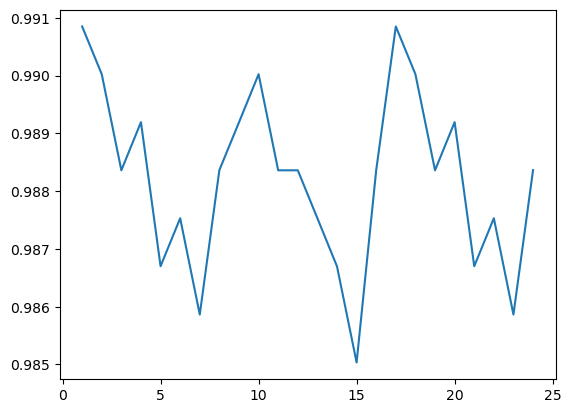

In [17]:
# Choose two letters for binary classification
letters = ['C', 'E']
df_binary = letters_df[letters_df['letter'].isin(letters)]
df_binary['letter'] = df_binary['letter'].map({'C': 0, 'E': 1})

# Split the data into features and target
X = df_binary.drop('letter', axis=1)
y = df_binary['letter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Classifier
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1)
start_time = time.time()
rf_grid.fit(X_train, y_train)
rf_time = time.time() - start_time

rf_best = rf_grid.best_estimator_
rf_y_pred = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

# SVM Classifier
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, n_jobs=-1)
start_time = time.time()
svm_grid.fit(X_train, y_train)
svm_time = time.time() - start_time

svm_best = svm_grid.best_estimator_
svm_y_pred = svm_best.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

# Plot accuracy vs epochs
epochs = range(1, len(rf_grid.cv_results_['mean_test_score']) + 1)
plt.plot(epochs, rf_grid.cv_results_['mean_test_score'], label='Random Forest')
plt.plot(epochs, svm_grid.cv_results_['mean_test_score'], label='SVM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()

# Print results
print(f"Random Forest Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Runtime: {rf_time} seconds")
print(f"Random Forest Classification Report:\n{rf_report}")

print(f"SVM Best Parameters: {svm_grid.best_params_}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Runtime: {svm_time} seconds")
print(f"SVM Classification Report:\n{svm_report}")

# Discuss pros and cons
print("Random Forest Pros: Handles missing values, less parameter tuning, interpretable.")
print("Random Forest Cons: Can be computationally expensive, may overfit with too many trees.")
print("SVM Pros: Effective in high-dimensional spaces, robust to overfitting.")
print("SVM Cons: Can be computationally expensive, sensitive to parameter choices.")

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_5040/1807037848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['letter'] = df_binary['letter'].map({'A': 0, 'B': 1})


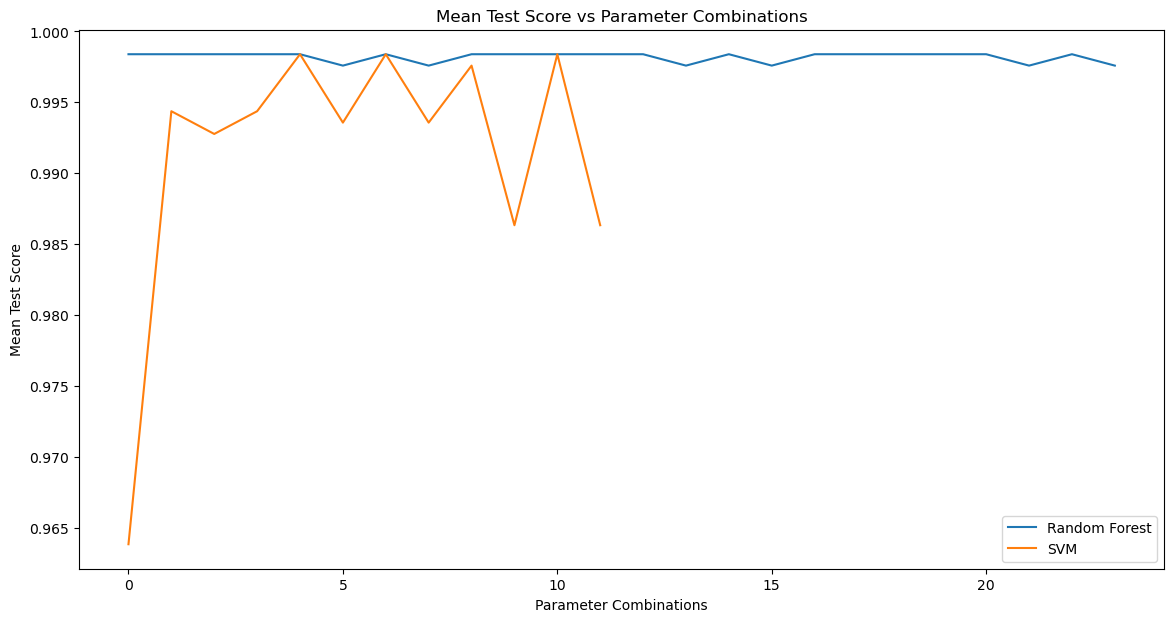

Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 1.0
Random Forest Runtime: 2.211885929107666 seconds
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       153

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311

SVM Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 1.0
SVM Runtime: 0.09124040603637695 seconds
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       153

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg     

In [11]:
# Choose two letters for binary classification
letters = ['A', 'B']
df_binary = letters_df[letters_df['letter'].isin(letters)]
df_binary['letter'] = df_binary['letter'].map({'A': 0, 'B': 1})

# Split the data into features and target
X = df_binary.drop('letter', axis=1)
y = df_binary['letter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Classifier
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1)
start_time = time.time()
rf_grid.fit(X_train, y_train)
rf_time = time.time() - start_time

rf_best = rf_grid.best_estimator_
rf_y_pred = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

# SVM Classifier
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, n_jobs=-1)
start_time = time.time()
svm_grid.fit(X_train, y_train)
svm_time = time.time() - start_time

svm_best = svm_grid.best_estimator_
svm_y_pred = svm_best.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

# Plot accuracy vs parameter combinations
plt.figure(figsize=(14, 7))
plt.plot(rf_grid.cv_results_['mean_test_score'], label='Random Forest')
plt.plot(svm_grid.cv_results_['mean_test_score'], label='SVM')
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score')
plt.legend()
plt.title('Mean Test Score vs Parameter Combinations')
plt.show()

# Print results
print(f"Random Forest Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Runtime: {rf_time} seconds")
print(f"Random Forest Classification Report:\n{rf_report}")

print(f"SVM Best Parameters: {svm_grid.best_params_}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Runtime: {svm_time} seconds")
print(f"SVM Classification Report:\n{svm_report}")

# Discuss pros and cons
print("Random Forest Pros: Handles missing values, less parameter tuning, interpretable.")
print("Random Forest Cons: Can be computationally expensive, may overfit with too many trees.")
print("SVM Pros: Effective in high-dimensional spaces, robust to overfitting.")
print("SVM Cons: Can be computationally expensive, sensitive to parameter choices.")
